## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Load the Balance Sheet and Income Statement Excel files into pandas DataFrames
balance_sheet_df = pd.read_excel('/Users/ishaan/Desktop/Financial Reports Project/Data/Balance_Sheet.xlsx')
income_statement_df = pd.read_excel('/Users/ishaan/Desktop/Financial Reports Project/Data/Income_Statement.xlsx')

In [49]:
# Display the first 10 rows of the balance sheet dataset
balance_sheet_df.head(10)

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000
5,5,2020,tech,MSFT,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000
6,6,2021,tech,MSFT,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000
7,7,2022,tech,MSFT,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000
8,8,2018,tech,GOOG,4378000000,16701000000,1.107000e+09,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000
9,9,2019,tech,GOOG,5561000000,18498000000,9.990000e+08,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000


In [50]:
# Display the first 10 rows of the income statement dataset
income_statement_df.head(10)

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000
5,5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000
6,6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000
7,7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000
8,8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000
9,9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000


In [51]:
# List of columns in each DataFrame
balance_sheet_columns = balance_sheet_df.columns.tolist()
income_statement_columns = income_statement_df.columns.tolist()

balance_sheet_columns, income_statement_columns

(['Unnamed: 0',
  'Year',
  'comp_type',
  'company',
  'Accounts Payable',
  'Cash',
  'Inventory',
  'Property Plant Equipment',
  'Short Term Investments',
  'Total Assets',
  'Total Current Assets',
  'Total Current Liabilities',
  'Total Liab',
  'Total Stockholder Equity'],
 ['Unnamed: 0',
  'Year',
  'comp_type',
  'company',
  'Cost Of Goods Sold',
  'Gross Profit',
  'Operating Income',
  'Total Operating Expenses',
  'Total Revenue'])

In [52]:
# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement_df, balance_sheet_df, on = ["Year", "company", "comp_type"])

In [53]:
df_ratios.columns.tolist()

['Unnamed: 0_x',
 'Year',
 'comp_type',
 'company',
 'Cost Of Goods Sold',
 'Gross Profit',
 'Operating Income',
 'Total Operating Expenses',
 'Total Revenue',
 'Unnamed: 0_y',
 'Accounts Payable',
 'Cash',
 'Inventory',
 'Property Plant Equipment',
 'Short Term Investments',
 'Total Assets',
 'Total Current Assets',
 'Total Current Liabilities',
 'Total Liab',
 'Total Stockholder Equity']

In [54]:
# Calculate leverage_ratio
df_ratios["leverage_ratio"] = df_ratios['Total Liab'] / df_ratios['Total Stockholder Equity']

In [55]:
# Calculate profitability_ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

In [56]:
# Calculate current ratio
df_ratios["current_ratio"] = (df_ratios["Total Current Assets"])/df_ratios["Total Current Liabilities"]
df_ratios.pivot_table(index="comp_type", values="current_ratio")

,current_ratio
comp_type,
fmcg,0.868631
real_est,1.025647
tech,2.561735


In [57]:
# Using a pivot table to see the "comp_type" with the lowest average profitability ratio
#print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
df_ratios.pivot_table(index="comp_type", values="profitability_ratio").idxmin()
lowest_profitability = "fmcg"

In [58]:
# Using a pivot table to see the "comp_type" with the highest average leverage ratio
df_ratios.pivot_table(index="comp_type", values="leverage_ratio").idxmax()

leverage_ratio    real_est
dtype: object

In [59]:
highest_leverage = "real_est"
relationship = "positive"
df_ratios.head(10)

,Unnamed: 0_x,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Unnamed: 0_y,...,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,leverage_ratio,profitability_ratio,current_ratio
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,0,...,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,2.741004,0.378178,1.540126
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,1,...,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,3.957039,0.382332,1.363604
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,2,...,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,4.563512,0.417794,1.074553
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,3,...,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,5.961537,0.433096,0.879356
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,4,...,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,1.800313,0.659020,2.528839
5,5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000,5,...,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,1.546921,0.677810,2.515765
6,6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000,6,...,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,1.350755,0.689258,2.079994
7,7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000,7,...,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,1.190679,0.684017,1.784607
8,8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000,8,...,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000,0.310559,0.564761,3.919006
9,9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000,9,...,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000,0.369670,0.555805,3.374052


In [60]:
df_ratios.pivot_table(index="company", values = ["current_ratio","profitability_ratio","leverage_ratio"],margins = True).reset_index()

,company,current_ratio,leverage_ratio,profitability_ratio
0,AAPL,1.214410,4.305773,0.402850
1,AMT,0.545022,8.599004,0.712812
2,AMZN,1.095287,2.461294,0.407094
3,BAM,1.498435,6.490149,0.204583
4,CCI,0.655699,2.830751,0.665978
5,GOOG,3.321982,0.386039,0.556437
6,KO,1.017670,3.414927,0.605645
7,META,4.949693,0.261966,0.816401
8,MSFT,2.227301,1.472167,0.677526
9,NSRGY,0.912116,1.529240,0.492077


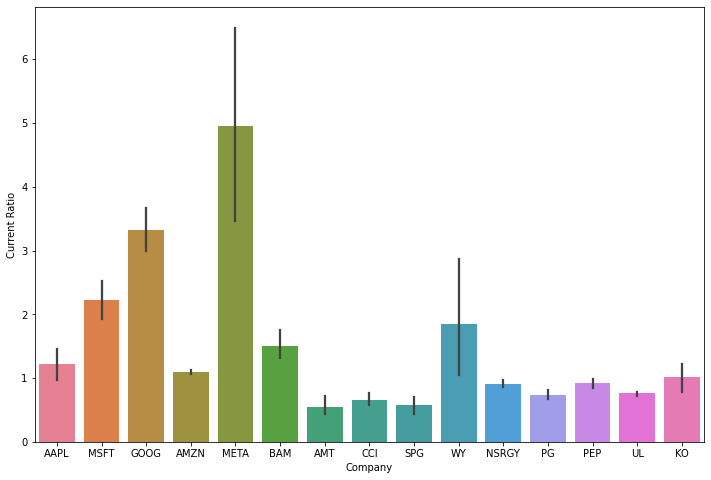

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_ratios, x = "company", y = "current_ratio",hue="company")

plt.ylabel("Current Ratio"), plt.xlabel("Company") 
plt.show()

Tech sector (AAPL, MSFT, GOOG, AMZN, META)

META (≈ 5.0) leads by a large margin — extremely liquid, likely due to massive cash holdings and limited short-term debt.
The tall error bar implies fluctuations across years or reporting periods.

GOOG (≈ 3.3) and MSFT (≈ 2.2) also show strong liquidity cushions.

AAPL (≈ 1.2) and AMZN (≈ 1.0) sit closer to the minimal comfort zone, consistent with Apple’s large payables and Amazon’s working-capital intensity.

Insight: Tech liquidity varies widely; cash-rich advertising/software models (META, GOOG) far exceed hardware/logistics players (AAPL, AMZN).



Real-estate / Infrastructure (BAM, AMT, CCI, SPG, WY)

Ratios hover mostly between 0.6 and 2.0, with WY (≈ 1.9) being relatively healthy and SPG/CCI (~ 0.7) quite low.

These values reflect the sector’s capital-intensive, debt-driven nature — assets are long-term while payables and short-term borrowings depress liquidity.

Insight: Liquidity tightness is structural; performance differences depend on portfolio leverage and cash-flow timing.




FMCG / Consumer staples (NSRGY, PG, PEP, UL, KO)

Ratios cluster around 0.9 to 1.1, showing stable but lean liquidity typical of mature, efficient supply chains.

None are excessively liquid and working capital is tightly managed to maximize returns.

Insight: Predictable cash cycles allow these firms to operate safely with low current ratios.



In [62]:
# explicit list of numeric columns (exclude comp_type and company)
df_ratios_corr = df_ratios[['Total Operating Expenses','Total Revenue','Total Assets','Total Liab','Total Stockholder Equity','leverage_ratio','profitability_ratio','current_ratio']].corr()

df_ratios_corr

,Total Operating Expenses,Total Revenue,Total Assets,Total Liab,Total Stockholder Equity,leverage_ratio,profitability_ratio,current_ratio
Total Operating Expenses,1.000000,0.980564,0.738458,0.758532,0.507614,-0.220979,-0.298143,0.054857
Total Revenue,0.980564,1.000000,0.796742,0.798727,0.578398,-0.245888,-0.250846,0.116333
Total Assets,0.738458,0.796742,1.000000,0.898084,0.693865,-0.189737,-0.320527,0.255121
Total Liab,0.758532,0.798727,0.898084,1.000000,0.341763,0.034287,-0.423057,-0.053301
Total Stockholder Equity,0.507614,0.578398,0.693865,0.341763,1.000000,-0.541660,0.101711,0.605150
leverage_ratio,-0.220979,-0.245888,-0.189737,0.034287,-0.541660,1.000000,0.153936,-0.498295
profitability_ratio,-0.298143,-0.250846,-0.320527,-0.423057,0.101711,0.153936,1.000000,0.218619
current_ratio,0.054857,0.116333,0.255121,-0.053301,0.605150,-0.498295,0.218619,1.000000


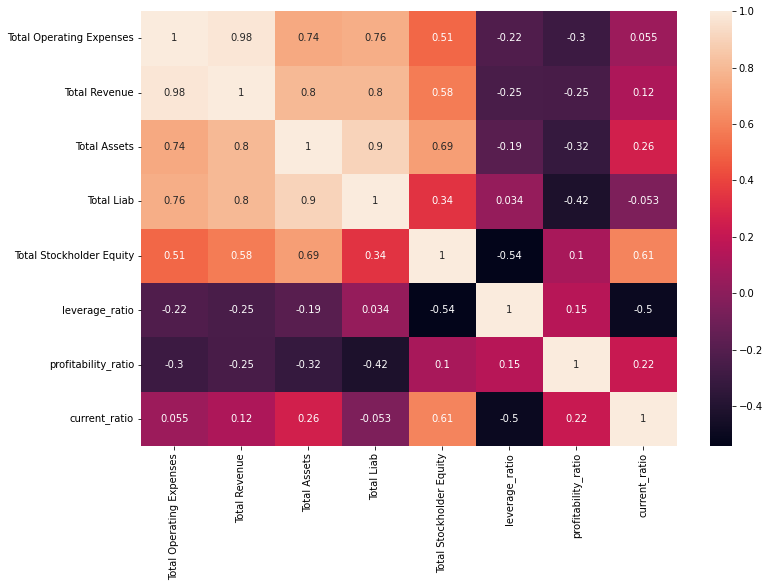

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_ratios_corr,annot=True) 
plt.show()

1. Scale relationships (upper block)

Operating Expenses & Revenue (0.98) and Revenue & Assets / Liabilities (0.8–0.9)
— Larger firms naturally incur higher costs, own more assets, and carry more liabilities.
This confirms the dataset’s internal consistency — as companies scale, both the balance sheet and P&L expand proportionally.

2. Capital structure dynamics

Liabilities & Assets (0.9) — expected; liabilities finance asset growth.

Equity & Leverage (–0.54) — inverse correlation: firms with stronger equity bases carry less debt.

Current Ratio & Leverage (–0.50) — higher liquidity corresponds to lower leverage, suggesting conservative funding structures in more liquid firms.

3. Profitability behavior

Profitability & Revenue (0.25) and & Assets (0.32) — mild positives indicate efficiency benefits with scale, though not very strong (margins vary by sector).

Profitability & Liabilities (–0.42) — profitability declines as leverage or debt load rises; interest expense likely erodes margins.

Profitability & Leverage (0.15) — slightly positive overall, implying that moderate leverage may enhance returns, but not materially.

4. Liquidity relationships

Current Ratio & Equity (0.61) — liquid firms tend to have healthier equity buffers.

Current Ratio & Profitability (0.22) — profitable firms maintain stronger liquidity, though the relationship is modest.

Current Ratio & Liabilities (–0.05) — near-zero correlation implies liquidity strength doesn’t depend solely on liability volume.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


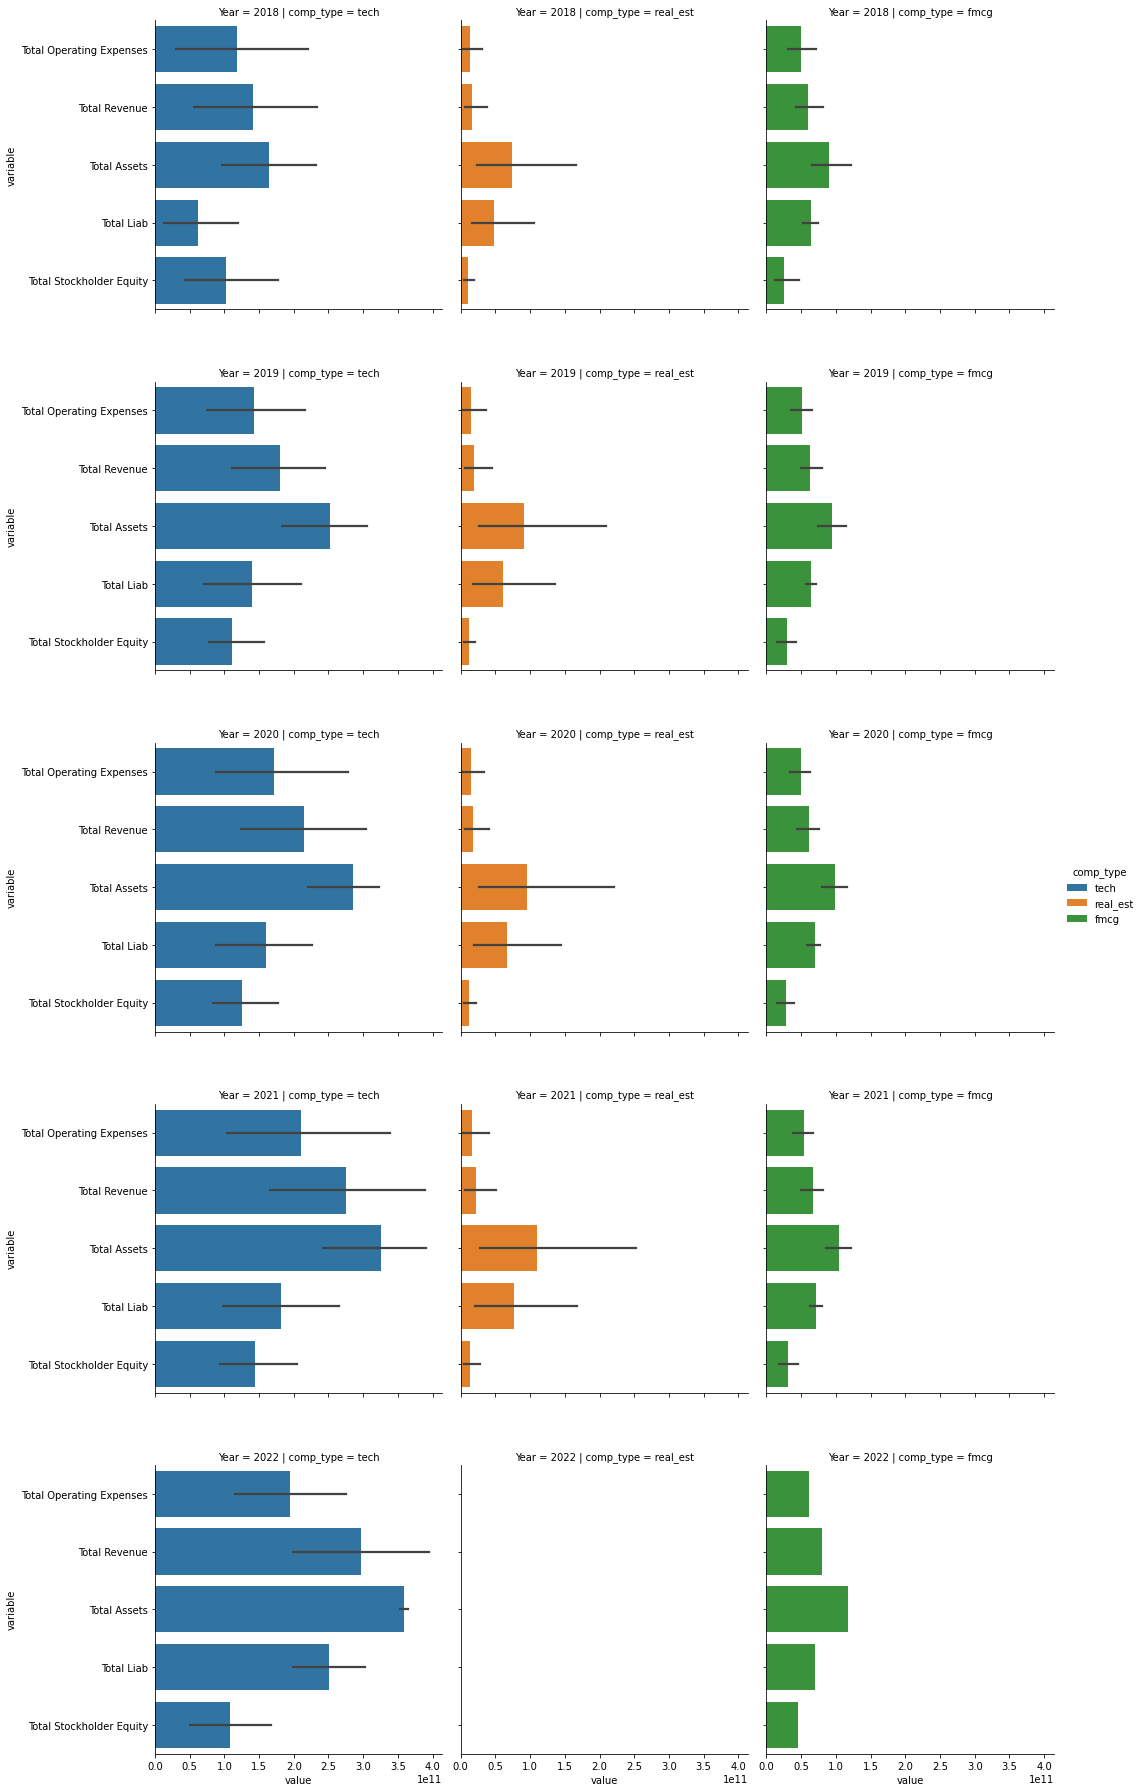

In [68]:
melted_df_amts=pd.melt(df_ratios, id_vars=['Year','comp_type'],value_vars=['Total Operating Expenses','Total Revenue','Total Assets','Total Liab','Total Stockholder Equity'])
#melted_df_ratios

sns.catplot(data=melted_df_amts, x="value", y="variable", row="Year", col = "comp_type", kind="bar", hue="comp_type")

plt.subplots_adjust(hspace=0.25)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


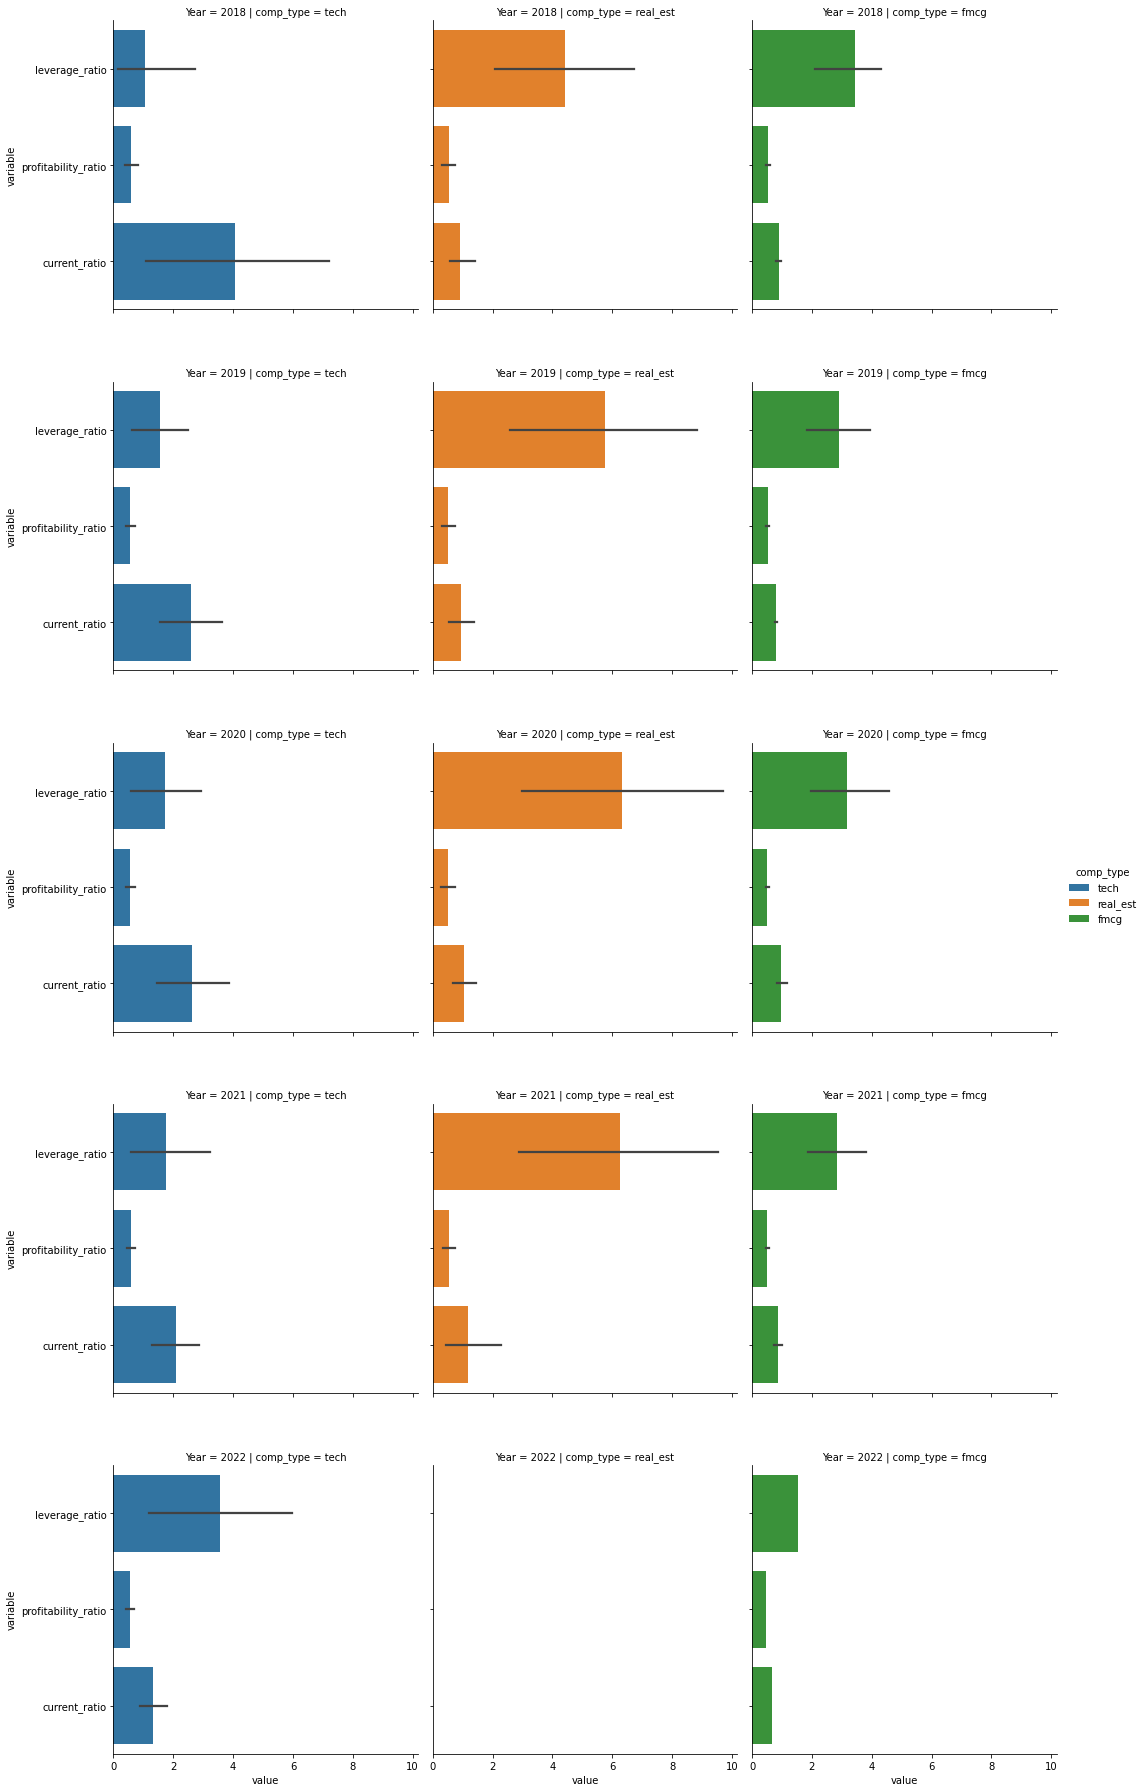

In [ ]:
melted_df_ratios=pd.melt(df_ratios, id_vars=['Year','comp_type'],value_vars=['leverage_ratio','profitability_ratio','current_ratio'])
#melted_df_ratios

sns.catplot(data=melted_df_ratios, x="value", y="variable", row="Year", col = "comp_type", kind="bar", hue="comp_type")

plt.subplots_adjust(hspace=0.25)

plt.show()

Current Ratio (Liquidity)

Tech again leads with the strongest liquidity, Reflects large cash/short-term investments relative to current liabilities.However we can notice a declining trend in this metric.

FMCG and Real Estate show low current ratios around 1×, and are stable through the period, implying tighter working-capital management or heavy short-term obligations.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 864x576 with 0 Axes>

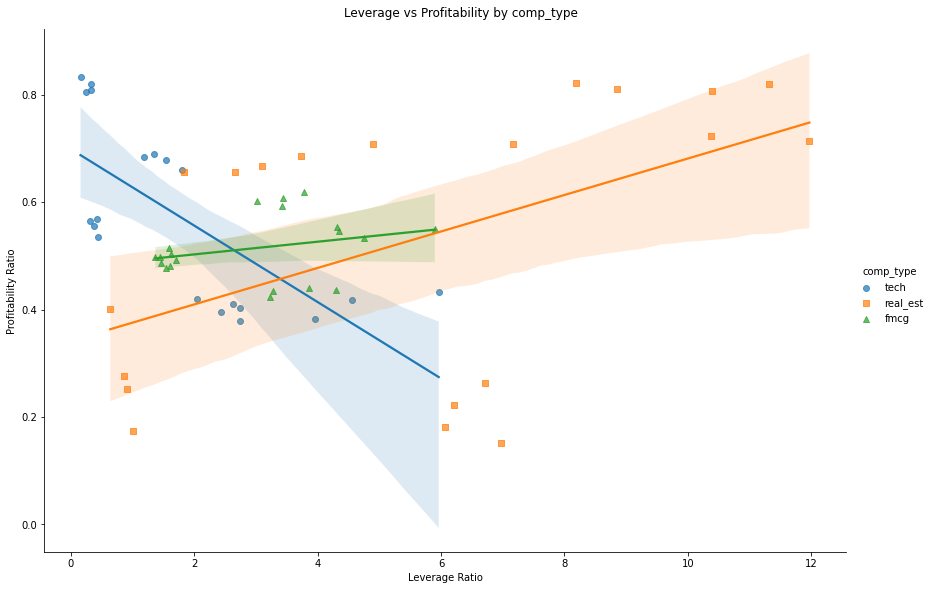

In [70]:
plt.figure(figsize=(12, 8))
g = sns.lmplot(
    data=df_ratios,
    x="leverage_ratio",
    y="profitability_ratio",
    hue="comp_type",
    height=8,
    aspect=1.5,
    markers=['o','s','^'],
    ci=95,
    scatter_kws={"alpha": 0.7}
)
g.set_axis_labels("Leverage Ratio", "Profitability Ratio")
g.fig.suptitle("Leverage vs Profitability by comp_type", y=1.02)
plt.show()

Leverage relation with profitibility: 
TECH Sector: Negative Relationship
REAL ESTATE Sector: Positive Relationship
FMCG Sector: Mild Positive/Inconclusive Relationship

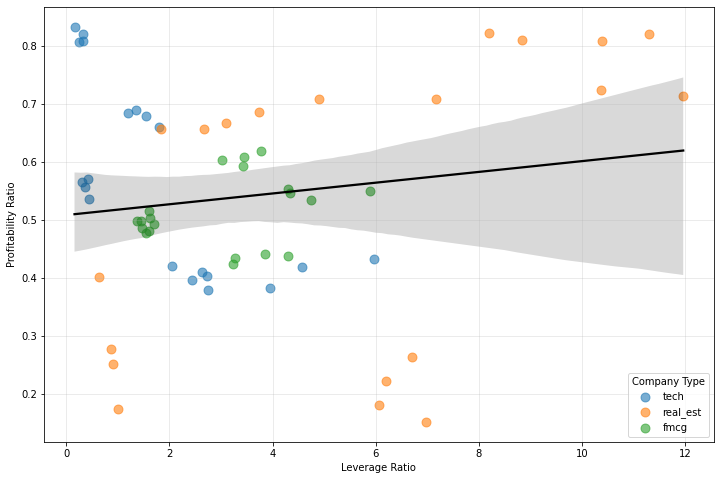

In [67]:
plt.figure(figsize=(12, 8))
# Create scatter plot with color coding by company type
for comp_type in df_ratios['comp_type'].unique():
    mask = df_ratios['comp_type'] == comp_type
    plt.scatter(df_ratios[mask]['leverage_ratio'], df_ratios[mask]['profitability_ratio'], 
                label=comp_type, alpha=0.6, s=80)

# Add regression line
sns.regplot(data=df_ratios, x=df_ratios["leverage_ratio"], y=df_ratios["profitability_ratio"],scatter=False,color='black')

plt.xlabel('Leverage Ratio')
plt.ylabel('Profitability Ratio')
plt.legend(title='Company Type')
plt.grid(True, alpha=0.3)
plt.show()

Observations

Slight positive slope:
The regression line trends upward—implying a mild positive relationship between leverage and profitability.
Companies with higher leverage tend to show slightly higher profitability, on average.

High dispersion:
The scatter points are widely spread around the regression line. This means that while a weak positive trend exists, the relationship is not strong—other variables likely drive profitability more directly than leverage.

Confidence band widening at higher leverage:
The blue shaded confidence region widens as leverage > 6, showing greater uncertainty in the model’s prediction for highly levered firms.
There are fewer data points at the extreme end (leverage > 8–10), making estimates less reliable there.